# Cruise Speed

In some cases, it might be required to maintain a minimum speed during cruise. Accordingly, wing and power loading needs to be constrained to ensure that the cruise speed requirement can be met. This section demonstrates this process for the example airplane. Section 3.6 from Roskam Part 1 provides some preliminary methods for estimating $W/S$ and $W/P$ for a given cruise speed requirement. Under some assumptions, cruise speed $V_{cr}$ can be shown to be proportional to power index $I_p$ which is given as

$$
    I_p = \bigg[ \frac{(W/S)}{\sigma (W/P)} \bigg]^{1/3},
$$

where $\sigma$ is the ratio of the density at cruise altitute to sea-level. The value of the $I_p$ for a given cruise speed can be estimated from the historical data for similar airplanes. Once $I_p$ is estimated, following inequality relation can be developed, refer to the lecture notes for more details.

$$
    \sigma I_p^3 \frac{W}{P} - \frac{W}{S} \leq 0
$$

For propeller driven airplanes, the power during cruise is typically set to 80%. Hence, the power needs to be converted from 80% setting at cruise altitude to takeoff power at sealevel. 

Based on the [mission specifications](../example_aircraft.md), the example aircraft should have a minimum cruise speed of 200 knots at 8,000 ft. Following table outlines the value of required variables for cruise speed analysis.

Parameter | Value | Source
----- | :----: | :----:
$I_p$ | 1.4 | Fig. 3.28, Roskam Part 1
$\sigma$ | 0.786 |  calculated at 8000 ft
$P_{TO_{8000}}/P_{TO_{sea}}$ | 0.758 | Nicolai \& Carichner, Eq. 14.5

Below code snippet plots the cruise speed requirement for the example aircraft and highlights the feasible region.

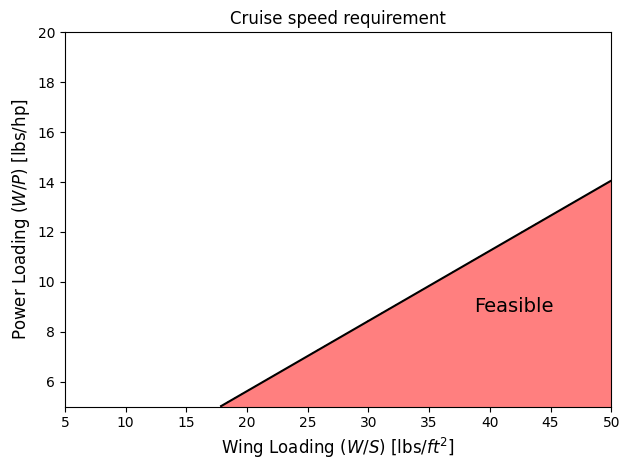

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Variables
ip = 1.4
sigma = 0.786
p8000_by_pTO = 0.758

# W/S amd W/P values - sealevel at takeoff power
num_pts = 500
wing_loading = np.linspace(5, 50, num_pts) # lb/ft^2
power_loading = np.linspace(5, 20, num_pts) # lb/hp
X, Y = np.meshgrid(wing_loading, power_loading)

cruise_speed_req = sigma * 1.4**3 * Y / p8000_by_pTO / 0.8 - X # 0.8 is for 80% power setting adjustment

# Plotting
fs = 12 # fontsize

fig, ax = plt.subplots()
ax.contour(X, Y, cruise_speed_req, colors="k", levels=[0])
ax.contourf(wing_loading, power_loading, cruise_speed_req<=0, colors="r", levels=[0.5,1], alpha=0.5)
ax.annotate("Feasible", (42,9), fontsize=14, va="center", ha="center")
ax.set_xlabel("Wing Loading ($W/S$) [lbs/$ft^2$]", fontsize=fs)
ax.set_ylabel("Power Loading ($W/P$) [lbs/hp]", fontsize=fs)
ax.set_title("Cruise speed requirement")
ax.tick_params(axis='both', labelsize=fs-2)
plt.tight_layout()

So, any point within this red feasbile region will be able to satisfy the cruise speed requirement.